In [1]:
# CNNs - extremely powerful tool for handling image data in Deep Learning

In [6]:
# Computer Vision - CNN application
# Image Kernels - 3x3 martices, multiplied by 3 by 3 of image pixel, 
# and sum the result to blur the image - stride over each pixel

In [7]:
# https://setosa.io/ev/image-kernels/

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from tensorflow.keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
one_img = x_train[0]

In [15]:
one_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

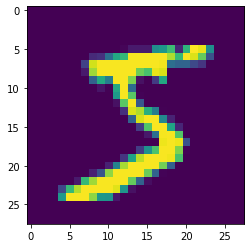

In [16]:
plt.imshow(one_img)

In [19]:
y_train[0]

5

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

In [32]:
y_train_categorical = to_categorical(y_train, 10)

In [33]:
y_train_categorical.shape

(60000, 10)

In [34]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [35]:
y_test_categorical = to_categorical(y_test,num_classes=10)

In [36]:
y_test_categorical

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
# to not miss any instance of the particular category, specify the exact number of classes

In [37]:
# Normalize The Data

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
# x_trainMinMax = scaler.fit_transform(x_train)
for x in x_train:
    x = scaler.fit_transform(x)
for x in x_test:
    x = scaler.transform(x)
# x_testMinMax = scaler.transform(x_test)

In [47]:
# x_train = x_train/255
# x_test = x_test/255

In [53]:
x_train = x_train.reshape(60000, 28,28, 1)
x_test = x_test.reshape(10000, 28,28, 1)

In [54]:
# Models

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [59]:
# Padding can also be specified in order to cover all of the parts of the image with the kernel size and stride steps

In [60]:
# Flatten out the image means taking the 28x28 image and converting it to the 1D array = 784

In [61]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# final output layer    softmax for multi-class classification problem

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
# Hyperparameters

In [63]:
# Parameters which should be changed according to the statement of the problem:

In [64]:
# input_shape in the Convolutional Layer, which should be as the shape of the one element in the train/test set

In [65]:
# number of neurons in the Dense layer which is final output layer - 10 in this specific problem where there are 10 classes

In [66]:
# activation function in the final Dense layer which is SOFTMAX, for multi-class classification problem

In [67]:
# activation fucntion could be SIGMOID for binary classification problem, such as Dog, or Cat Images problem

In [68]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)
# Looking for early stop from the output of the Loss=categorical_crossentropy

In [70]:
model.fit(x_train, y_train_categorical,epochs=10, validation_data=(x_test,y_test_categorical), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 45s 756us/sample - loss: 0.1319 - acc: 0.9610 - val_loss: 0.0512 - val_acc: 0.9834
Epoch 2/10
60000/60000 [==============================] - 47s 778us/sample - loss: 0.0446 - acc: 0.9859 - val_loss: 0.0371 - val_acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 43s 722us/sample - loss: 0.0291 - acc: 0.9908 - val_loss: 0.0463 - val_acc: 0.9853


In [71]:
metrics = pd.DataFrame(model.history.history)

In [73]:
metrics

,loss,acc,val_loss,val_acc
0,0.131851,0.961033,0.051205,0.9834
1,0.044564,0.985950,0.037088,0.9880
2,0.029120,0.990850,0.046293,0.9853


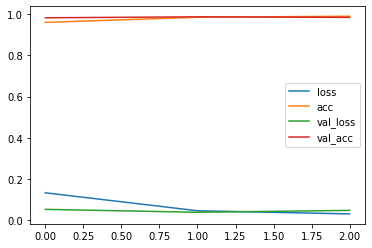

In [74]:
 metrics.plot()

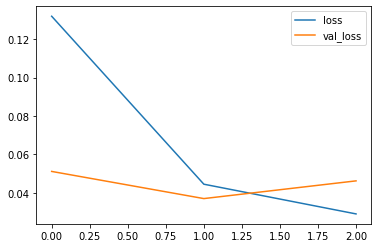

In [76]:
metrics[['loss', 'val_loss']].plot()

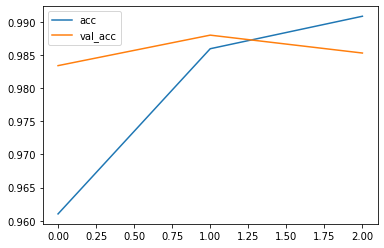

In [84]:
metrics[['acc', 'val_acc']].plot()

In [86]:
model.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 2s 150us/sample - loss: 0.0463 - acc: 0.9853


[0.04629282219687011, 0.9853]

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
predictions = model.predict_classes(x_test)
# PREDICT_CLASSES

In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       1.00      0.95      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [106]:
confusion_matrix(y_test, predictions)

array([[ 975,    0,    0,    1,    0,    0,    3,    0,    1,    0],
       [   0, 1120,    4,    1,    1,    2,    3,    1,    3,    0],
       [   1,    0, 1022,    0,    0,    0,    2,    4,    3,    0],
       [   0,    0,    5,  988,    0,   10,    0,    0,    7,    0],
       [   0,    0,    0,    0,  976,    0,    2,    0,    1,    3],
       [   2,    0,    0,    2,    0,  884,    3,    0,    1,    0],
       [   3,    1,    0,    0,    1,    5,  946,    0,    2,    0],
       [   1,    1,    7,    2,    2,    1,    0, 1012,    2,    0],
       [   3,    0,    1,    1,    0,    1,    1,    0,  967,    0],
       [   1,    3,    1,    0,   10,   12,    0,    6,   13,  963]],
      dtype=int64)

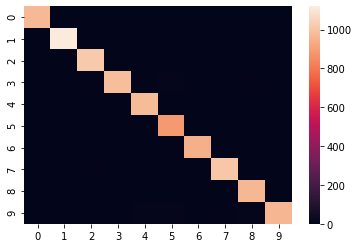

In [110]:
sns.heatmap(confusion_matrix(y_test, predictions))

In [111]:
test_num = x_test[21]

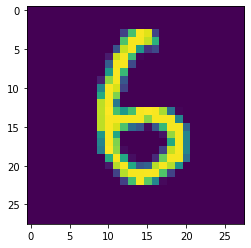

In [113]:
plt.imshow(test_num.reshape(28, 28))

In [118]:
# Num of image = 1, width=28, height=28, color_channel=1
model.predict_classes(test_num.reshape(1, 28,28,1))

array([6], dtype=int64)